---
layout: default
title: "Deep Learning - CNN - Convolutional NN"
categories: deeplearning
permalink: /ML34/
order: 34
comments: true
---

In [1]:
%pylab --no-import-all inline
from plot_ann import ann
plt.rcParams["mathtext.fontset"] = "cm"
import pandas as pd
import cv2
from scipy.signal import convolve2d, correlate2d

Populating the interactive namespace from numpy and matplotlib


# Convolutional neural network
From what we have seen in <a hre="ML33#fig:multifilter">the multiple filters figure</a>, e can proceed to produce one layer of out convolutional neural network. Building on the application of multiple filters to a single image, we can imagine to add the bias terms $b_i \in \mathbb{R}$  and apply a non-linear activation funtion, to the single, 1-channel output matrices.

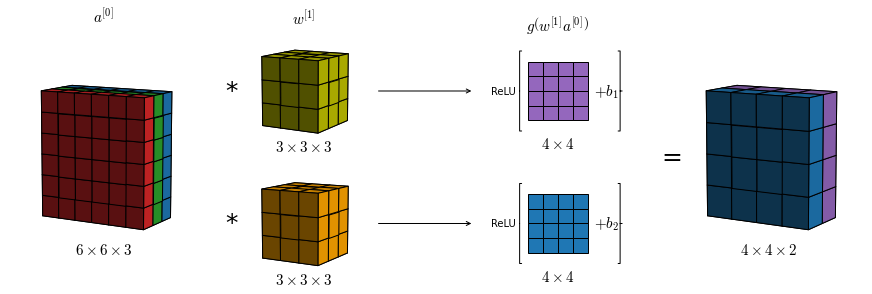

In [286]:
fig = plt.figure(constrained_layout=True, figsize=(12, 4))
gs = fig.add_gridspec(2, 4)
ax1 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[1, 2])
ax3 = fig.add_subplot(gs[:, 3], projection='3d')

ax4 = fig.add_subplot(gs[:, 0], projection='3d')
ax5 = fig.add_subplot(gs[0, 1], projection='3d')
ax6 = fig.add_subplot(gs[1, 1], projection='3d')
out = np.array(list(' '*16)).reshape(4, 4)

tabs =  []
tabs.append(ax1.table(out, loc='center', cellColours=np.array(['C4']*16).reshape(4, 4)))
tabs.append(ax2.table(out, loc='center', cellColours=np.array(['C0']*16).reshape(4, 4)))

x, y, z = np.indices((4, 2, 4))
l1 = (x >= 0) & (y == 0) & (z >= 0)
l2 = (x >= 0) & (y == 1) & (z >= 0)
voxels = l1 | l2
colors = np.empty(voxels.shape, dtype=object)
colors[l1] = 'C4'
colors[l2] = 'C0'
ax3.voxels(voxels, edgecolor='k', facecolors=colors)
ax3.set_box_aspect([4, 2, 4])
ax3.view_init(elev=10, azim=120)
ax3.set_axis_off()
ax3.text2D(0.5, 0, '$ 4 \\times 4 \\times 2$', fontsize=15, transform=ax3.transAxes, ha='center')
ax3.text2D(0, 0.5, '=', fontsize=25, transform=ax3.transAxes, ha='center', va='center')


x, y, z = np.indices((6, 3, 6))
r = (x >= 0) & (y == 2) & (z >= 0)
g = (x >= 0) & (y == 1) & (z >= 0)
b = (x >= 0) & (y == 0) & (z >= 0)
voxels = r | g | b 
colors = np.empty(voxels.shape, dtype=object)
colors[r] = 'C3'
colors[g] = 'C2'
colors[b] = 'C0'
ax4.voxels(voxels, edgecolor='k', facecolors=colors)
ax4.set_box_aspect([6, 3, 6])
ax4.view_init(elev=10, azim=120)
ax4.set_axis_off()
ax4.text2D(0.5, 0, '$ 6 \\times 6 \\times 3$', fontsize=15, transform=ax4.transAxes, ha='center')

x, y, z = np.indices((3, 3, 3))
voxels = (x >= 0) & (y >=0) & (z >= 0)
colors = np.full_like(voxels, 'y', dtype=object)
ax5.voxels(voxels, edgecolor='k', facecolors=colors)
ax5.set_box_aspect([3, 3, 3])
ax5.view_init(elev=10, azim=120)
ax5.set_axis_off()
ax5.text2D(0.5, 0, '$3 \\times 3 \\times 3$', transform=ax5.transAxes, fontsize=15, ha='center')
ax5.text2D(-.1, 0.5, '*', transform=ax5.transAxes, fontsize=25, va='center', ha='center')
ax5.annotate('', (1.1, 0.5), (-.2, 0.5), xycoords=ax5.transAxes, textcoords=ax1.transAxes, arrowprops=dict(arrowstyle='<-'))

x, y, z = np.indices((3, 3, 3))
voxels = (x >= 0) & (y >=0) & (z >= 0)
colors = np.full_like(voxels, 'orange', dtype=object)
ax6.voxels(voxels, edgecolor='k', facecolors=colors)
ax6.set_box_aspect([3, 3, 3])
ax6.view_init(elev=10, azim=120)
ax6.set_axis_off()
ax6.text2D(0.5, 0, '$3 \\times 3 \\times 3$', transform=ax6.transAxes, fontsize=15, ha='center')
ax6.text2D(-.1, 0.5, '*', transform=ax6.transAxes, fontsize=25, va='center', ha='center')
ax6.annotate('', (1.1, 0.5), (-.2, 0.5), xycoords=ax6.transAxes, textcoords=ax2.transAxes, arrowprops=dict(arrowstyle='<-'))

for i, (tab, ax) in enumerate(zip(tabs, [ax1, ax2]), 1):
    tab.scale(0.5, 1)
    ax.set_aspect('equal')
    ax.annotate('ReLU', (-.1, 0.5), (-.2, 0.5), textcoords=tab, xycoords=tab, ha='right', va='center', arrowprops=dict(arrowstyle='-[,widthB=4.0,lengthB=0.2'))
    ax.annotate('', (1.5, 0.5), (1.6, 0.5), textcoords=tab, xycoords=tab, ha='right', va='center', arrowprops=dict(arrowstyle='-[,widthB=4.0,lengthB=0.2'))
    ax.text(0.8, 0.5, '$+b_{}$'.format(i), fontsize=15, va='center')
    ax.text(0.5, 0, '$4 \\times 4$', va='bottom', ha='center', fontsize=15)
    ax.set_axis_off()

ax4.text2D(0.5, 1.2, '$a^{[0]}$', transform=ax4.transAxes, fontsize=15, ha='center')
ax5.text2D(0.5, 1.06, '$w^{[1]}$', transform=ax5.transAxes, fontsize=15, ha='center')
ax1.text(0.5, 1, '$g \\left( w^{[1]}a^{[0]} \\right )$', transform=ax1.transAxes, fontsize=15, ha='center');